In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split ,cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from pycaret.classification import *

In [26]:
data = pd.read_csv(r'C:\Users\Anderson Whittle\OneDrive\Documents\School\CX 4240\archive (1)\heart_failure_clinical_records_dataset.csv')

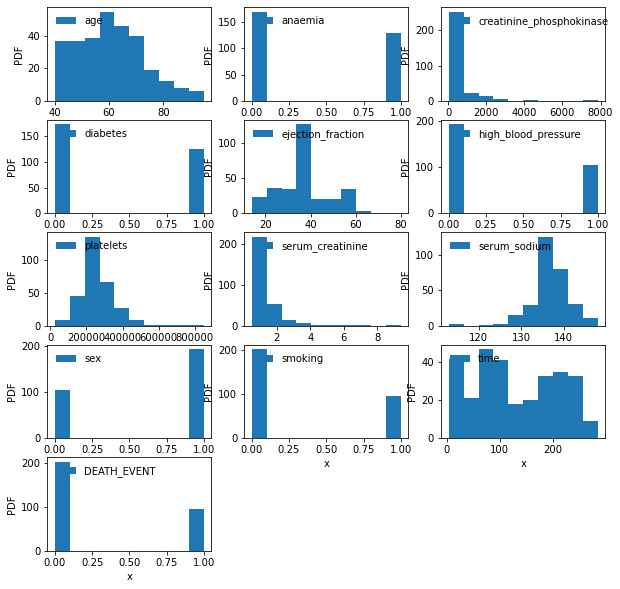

In [29]:
#visualize pdf's of each variable in 
ncols = 3
nrows = int(np.ceil(len(data.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(data.columns):
            ax.hist(data[data.columns[counter]], alpha = 1,  label='{}'.format(data.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('PDF')
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()

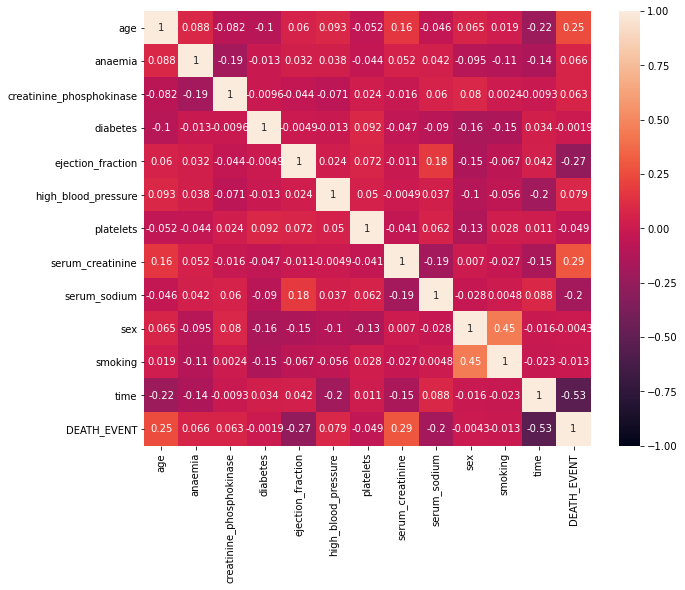

In [31]:
#plot heatmap to show relationship of inputs to outputs
corr = data.corr()
ax , fig  = plt.subplots(figsize =(10 , 8 ))
sns.heatmap(corr ,vmin = -1 , annot = True)
plt.show()

In [20]:
#use pycaret to split data into testing and training
exp = setup(data, target = 'DEATH_EVENT', normalize=True)

,Description,Value
0,session_id,3805
1,Target,DEATH_EVENT
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(299, 13)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
#all models for comparison
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [22]:
#compare all models above and pick the model with the highest f1 score (mean of recall and accuracy)
best = compare_models(sort='F1', turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8607,0.9186,0.7571,0.8367,0.7717,0.6766,0.6934,0.0260
lda,Linear Discriminant Analysis,0.8514,0.8876,0.7571,0.8159,0.7696,0.6627,0.6756,0.0030
ridge,Ridge Classifier,0.8514,0.0000,0.7429,0.8209,0.7643,0.6589,0.6720,0.0020
rbfsvm,SVM - Radial Kernel,0.8371,0.8890,0.7286,0.7869,0.7440,0.6269,0.6370,0.0030
lr,Logistic Regression,0.8464,0.8886,0.7143,0.8211,0.7438,0.6395,0.6543,0.2960
lightgbm,Light Gradient Boosting Machine,0.8321,0.8674,0.7286,0.7823,0.7430,0.6206,0.6301,0.0700
et,Extra Trees Classifier,0.8419,0.8885,0.6857,0.8345,0.7379,0.6288,0.6454,0.0230
ada,Ada Boost Classifier,0.8271,0.8461,0.7143,0.7662,0.7344,0.6075,0.6123,0.0110
gbc,Gradient Boosting Classifier,0.8131,0.8594,0.6857,0.7473,0.7080,0.5726,0.5789,0.0100
svm,SVM - Linear Kernel,0.7938,0.0000,0.7429,0.6962,0.6994,0.5473,0.5638,0.0030


In [24]:
#tune top model parameters
rf = create_model('rf')
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8673,0.7143,0.7143,0.7143,0.5714,0.5714
1,0.9048,0.8980,0.8571,0.8571,0.8571,0.7857,0.7857
2,0.8571,0.9490,0.7143,0.8333,0.7692,0.6667,0.6708
3,0.9524,1.0000,1.0000,0.8750,0.9333,0.8966,0.9014
4,0.7143,0.7551,0.7143,0.5556,0.6250,0.4000,0.4082
5,0.7619,0.8163,0.7143,0.6250,0.6667,0.4828,0.4854
6,0.9524,0.9592,1.0000,0.8750,0.9333,0.8966,0.9014
7,0.9524,0.9898,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.9048,0.8878,0.7143,1.0000,0.8333,0.7692,0.7906
9,0.8000,0.7912,0.5714,0.8000,0.6667,0.5294,0.5447
